# Universidad de Costa Rica 

## Facultad de Ingeniería
## Escuela de Ingeniería Eléctrica
## IE0405 - Modelos Probabilísticos de Señales y Sistemas
### Herbert Alonso Prado Zúñiga 
### B55530
## Pregunta 1

Crear un esquema de modulación BPSK para los bits presentados. Esto implica asignar una forma de onda sinusoidal normalizada (amplitud unitaria) para cada bit y luego una concatenación de todas estas formas de onda.

A continuación se presenta la señal modulada sin ruido.


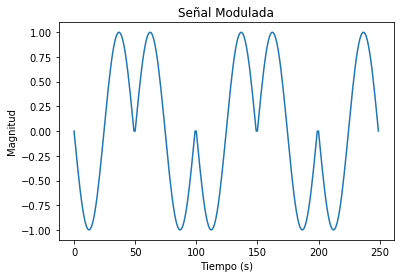

In [2]:
# -- coding: utf-8 --
"""
Created on Thu Jul  2 19:37:01 2020

@author: alons
"""
import numpy as np
import pandas as pd
from scipy import signal
from scipy import integrate
import matplotlib.pyplot as plt

# Número de bits
N = 10000

# Leer archivo csv
data = pd.read_csv('bits10k.csv', header = None )
# Cambiar el orden del array de bits 10k
bits = np.array(data)

'''
1. Crear un esquema de modulación BPSK
para los bits presentados. Esto implica 
asignar una forma de onda sinusoidal normalizada 
(amplitud unitaria) para cada bit y luego una 
concatenación de todas estas formas de onda.
'''

print('A continuación se presenta la señal modulada sin ruido.')

# Frecuencia de Operación
f = 5000 # Hz

# Duración del período de cada símbolo (onda)

T = 1/f # 5ms

# Número de puntos de muestreo por período
p = 50

# Puntos de muestreo para cada período
tp = np.linspace(0,T,p)

# Creación de la forma de onda de la portadora
sinus = np.sin(2*np.pi * f * tp)

# Visualización de a forma de onda de la portadora

#plt.plot(tp, sinus)
#plt.xlabel('Tiempo / s')

# Frecuencia de muestreo

fs = p/T # 50 kHz

# Creación de la línea temporal 
# para todad la señal Tx
t = np.linspace(0, N * T , N * p)

# Inicializar el vector de la señal
senal = np.zeros(t.shape)

# Cosas útiles
    # print(list(enumerate(bits))) # Muestra la posición y el bit que contiene es posición
    # bits[1:5] # Para mostrar el rango que quiero del punto anterior

# Creación de la señal modulada BPSK
for k, b in enumerate(bits):    
    
     if b == 1:
       senal[k*p:(k+1)*p] = sinus
       
     else:
       senal[k*p:(k+1)*p] = -sinus 
     
# Se imprime la señal modulada 
# (No se gráfica toda debido a que no se aprecia bien la forma que esta tiene)

plt.plot(senal[0: 250]) 
plt.title('Señal Modulada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Magnitud')
plt.show()

## Pregunta 2

Calcular la potencia promedio de la señal modulada generada.

In [4]:
'''
2. Calcular la potencia promedio 
de la señal modulada generada.
'''  

# Potencia instantánea
Pinst = senal**2

# Potencia promedio a partir de la potencia instantánea (W)
Ps = integrate.trapz(Pinst, t) / (N * T)

print('La potencia promedio de la señal modulada generada es:', Ps )

La potencia promedio de la señal modulada generada es: 0.4900009800019598


## Pregunta 3

Simular un canal ruidoso del tipo AWGN (ruido aditivo blanco gaussiano) con una relación señal a ruido (SNR) desde -2 hasta 3 dB.

A continuación se imprimen 6 señales moduladas con diferentes relaciones señal a ruido, comenzando desde -2 hasta 3 dB.


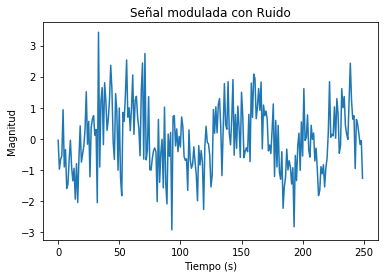

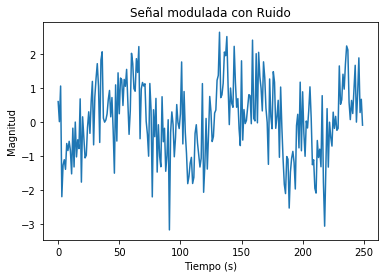

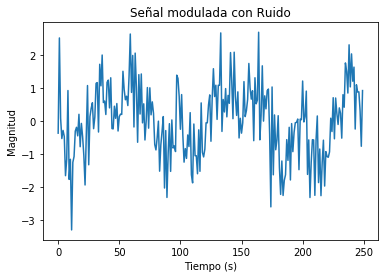

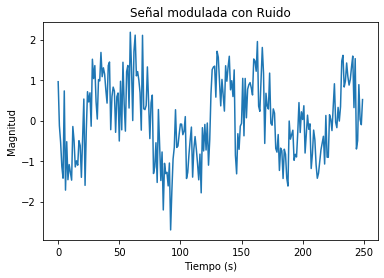

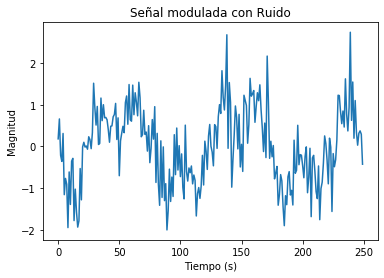

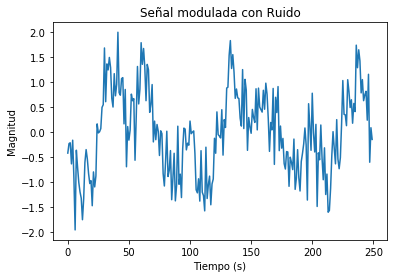

In [9]:
'''
3. Simular un canal ruidoso del tipo 
AWGN (ruido aditivo blanco gaussiano) 
con una relación señal a ruido (SNR) 
desde -2 hasta 3 dB.
'''
print('A continuación se imprimen 6 señales moduladas con diferentes relaciones señal a ruido, comenzando desde -2 hasta 3 dB.')

# Se crea el vector de sigmas para la gráfica del punto 6
SigmaVevtor=[]

# Relación señal-a-ruido deseada
for SNR in range(-2,4):

# Potencia del ruido para SNR y potencia de la señal dadas
    Pn = Ps / (10**(SNR / 10))

# Desviación estándar del ruido
    sigma = Pn**(1/2)
    SigmaVevtor.append(sigma)

# Crear ruido (Pn = sigma^2)
    ruido = np.random.normal(0, sigma, senal.shape)

# Simular "el canal": señal recibida 
    Rx = senal + ruido
    
    plt.plot(Rx[0: 250])
    plt.title('Señal modulada con Ruido')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Magnitud')
    plt.show()

## Pregunta 4

Graficar la densidad espectral de potencia de la señal con el método de Welch (SciPy), antes y después del canal ruidoso.


A continuación se presentan las gráficas de la densidad espectral de la potencia de la señal.


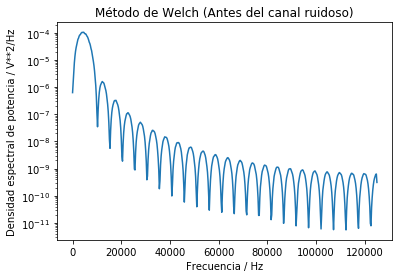

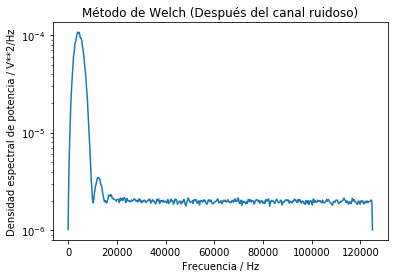

In [10]:
print('A continuación se presentan las gráficas de la densidad espectral de la potencia de la señal.')

# Antes del canal ruidoso
fw, PSD = signal.welch(senal, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.title( 'Método de Welch (Antes del canal ruidoso)')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.show()

# Después del canal ruidoso
fw, PSD = signal.welch(Rx, fs, nperseg=1024)
plt.figure()
plt.semilogy(fw, PSD)
plt.title('Método de Welch (Después del canal ruidoso)')
plt.xlabel('Frecuencia / Hz')
plt.ylabel('Densidad espectral de potencia / V**2/Hz')
plt.show()

## Pregunta 5

Demodular y decodificar la señal y hacer un conteo de la tasa de error de bits (BER, bit error rate) para cada nivel SNR.

In [11]:
'''
5. Demodular y decodificar la señal y hacer un conteo 
de la tasa de error de bits (BER, bit error rate)
para cada nivel SNR.
'''
print('A continuación se imprimen los errores presentados por la demodulación, comenzando desde -2 hasta 3 dB.')

vectorBER = []

for SNR in range(-2,4):


# Pseudo-energía de la onda original (esta es suma, no integral)
    Es = np.sum(sinus**2)

# Inicialización del vector de bits recibidos
    bitsRx = np.zeros(bits.shape)


# Decodificación de la señal por detección de energía
    for k, b in enumerate(bits):
        Ep = np.sum(Rx[k*p:(k+1)*p] * sinus) # Energía contenida en cada punto de análisis # Y producto interno de dos funciones
        if Ep > Es/2:
           bitsRx[k] = 1
        else:
          bitsRx[k] = 0
        
    err = np.sum(np.abs(bits - bitsRx))
    BER = err/N
    vectorBER.append(BER)
    print('Hay un total de {} errores en {} bits para una tasa de error de {}.'.format(err, N, BER)) 

Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0.
Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0.
Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0.
Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0.
Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0.
Hay un total de 0.0 errores en 10000 bits para una tasa de error de 0.0.


## Pregunta 6

Graficar BER versus SNR.

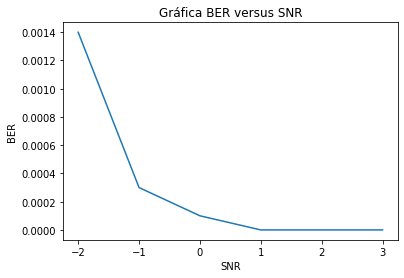

In [12]:
'''
6. Graficar BER versus SNR.
''' 

# Pseudo-energía de la onda original (esta es suma, no integral)
Es = np.sum(sinus**2)

# Inicialización del vector de bits recibidos
bitsRx = np.zeros(bits.shape)

# Se crea el vector de BER para poder graficar en el punto 6
vectorBER = []

# Decodificación de la señal por detección de energía
for s in SigmaVevtor:
    
    Rx = senal + np.random.normal(0, s, senal.shape)
    
    for k, b in enumerate(bits):
        Ep = np.sum(Rx[k*p:(k+1)*p] * sinus) # Energía contenida en cada punto de análisis # Y producto interno de dos funciones
        if Ep > Es/2:
            bitsRx[k] = 1
        else:
            bitsRx[k] = 0
    err = np.sum(np.abs(bits - bitsRx))
    BER = err/N
    vectorBER.append(BER)
    
SNR1 = [-2,-1,0,1,2,3]
     
plt.plot(SNR1,vectorBER)
plt.title('Gráfica BER versus SNR')
plt.ylabel('BER')
plt.xlabel('SNR')
plt.show()